In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('weatherAUS.csv')

In [3]:
df.head(20)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

In [5]:
data_err=[]
for i,j in zip(df['RISK_MM'][0:-2],df['Rainfall'][1:-1]):
    data_err.append(i-j)
cc = pd.DataFrame(data_err,columns=['Error'])
cc[cc['Error']!=0].count().values[0]

21

In [6]:
rainfall=[0.6]
for i in df['RISK_MM']:
    rainfall.append(i)
df['Rainfall']=pd.DataFrame(rainfall)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         142193 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

In [7]:
data_err=[]
for i,j in zip(df['RISK_MM'][0:-2],df['Rainfall'][1:-1]):
    data_err.append(i-j)
cc = pd.DataFrame(data_err,columns=['Error'])
cc[cc['Error']!=0].count().values[0]

0

In [8]:
df.drop(columns=['Date','RainToday','RISK_MM'],inplace=True)

In [9]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,142193.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.360686,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235
std,6.403283,7.117618,8.477968,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [10]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['RainTomorrow']=label.fit_transform(df['RainTomorrow'])

In [11]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0


# Separating data numbers and object

In [12]:
data_num = [num for num in df.columns if df[num].dtype!='O']
data_obj = [obj for obj in df.columns if df[obj].dtype=='O']

In [13]:
print(data_num)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainTomorrow']


In [14]:
print(data_obj)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']


# Data obj sampling

In [15]:
df_obj=df[data_obj]
df_obj.head()

,Location,WindGustDir,WindDir9am,WindDir3pm
0,Albury,W,W,WNW
1,Albury,WNW,NNW,WSW
2,Albury,WSW,W,WSW
3,Albury,NE,SE,E
4,Albury,W,ENE,NW


In [16]:
wgd_dum=pd.get_dummies(df_obj['WindGustDir'],prefix='WGD',prefix_sep='_',dummy_na=True,drop_first=True)
wd9_dum=pd.get_dummies(df_obj['WindDir9am'],prefix='WD9',prefix_sep='_',dummy_na=True,drop_first=True)
wd3_dum=pd.get_dummies(df_obj['WindDir3pm'],prefix='WD3',prefix_sep='_',dummy_na=True,drop_first=True)

# Data Number optimization

In [17]:
df_num=df[data_num]
df_num.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0


In [18]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 17 columns):
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         142193 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustSpeed    132923 non-null float64
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainTomorrow     142193 non-null int32
dtypes: float64(16), int32(1)
memory usage: 17.9 MB


In [19]:
df_num.isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall             0
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainTomorrow         0
dtype: int64

In [20]:
df_num[df_num['MinTemp'].isna()].head(20)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
282,NaN,18.8,0.0,NaN,NaN,31.0,7.0,19.0,83.0,46.0,1022.2,1018.2,NaN,NaN,8.7,18.1,0
439,NaN,31.2,0.0,NaN,NaN,31.0,7.0,7.0,33.0,24.0,1020.4,1019.1,NaN,NaN,21.0,30.0,0
447,NaN,26.3,0.0,NaN,NaN,26.0,9.0,13.0,70.0,62.0,1019.4,1018.3,2.0,2.0,20.8,24.8,1
452,NaN,22.3,0.0,NaN,NaN,37.0,24.0,17.0,74.0,93.0,1008.8,1006.6,8.0,8.0,20.9,20.1,1
603,NaN,11.8,0.0,NaN,NaN,28.0,2.0,19.0,97.0,65.0,1019.5,1018.3,7.0,4.0,6.7,11.3,0
1667,NaN,18.5,0.0,NaN,NaN,37.0,17.0,17.0,73.0,52.0,1016.4,1015.8,NaN,1.0,11.4,17.8,0
3172,NaN,16.9,0.0,NaN,NaN,22.0,0.0,7.0,72.0,46.0,1024.4,1020.3,NaN,NaN,8.3,15.0,0
3181,NaN,19.3,1.4,NaN,NaN,15.0,6.0,7.0,100.0,69.0,1020.4,1017.7,NaN,NaN,13.5,18.9,0
3285,NaN,21.0,7.0,NaN,NaN,46.0,NaN,6.0,NaN,57.0,1020.6,1016.9,NaN,NaN,NaN,18.7,1
3306,NaN,26.1,14.6,NaN,NaN,31.0,9.0,11.0,84.0,52.0,1026.1,1021.5,NaN,NaN,16.7,24.6,0


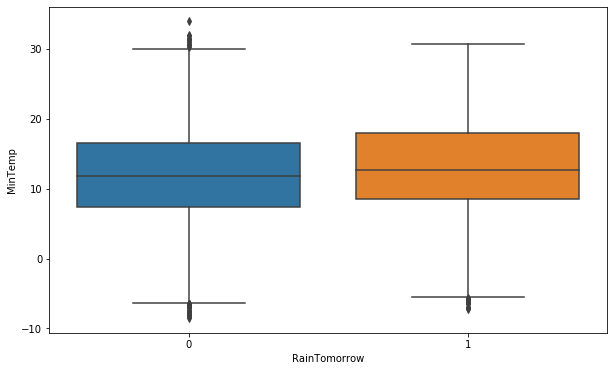

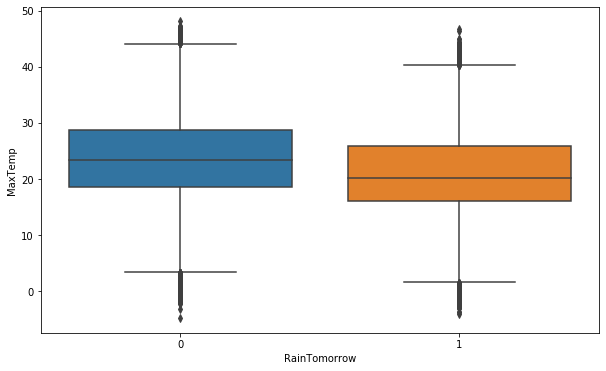

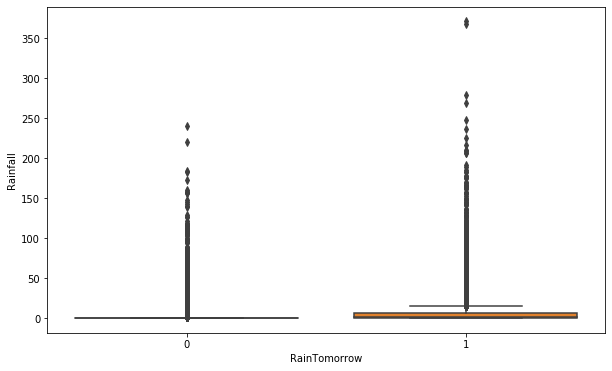

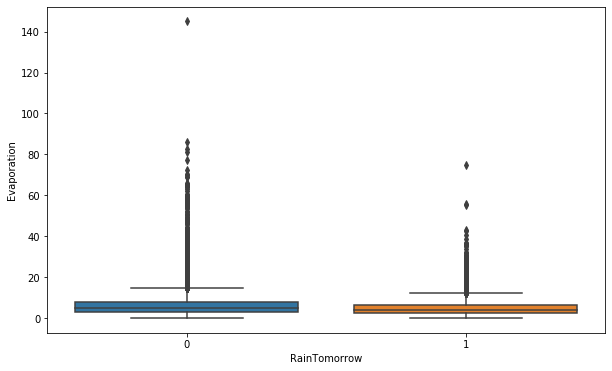

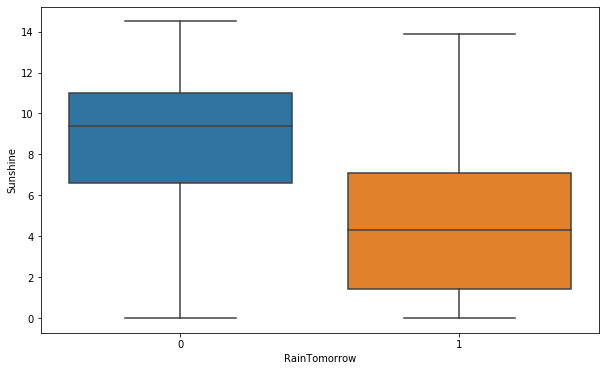

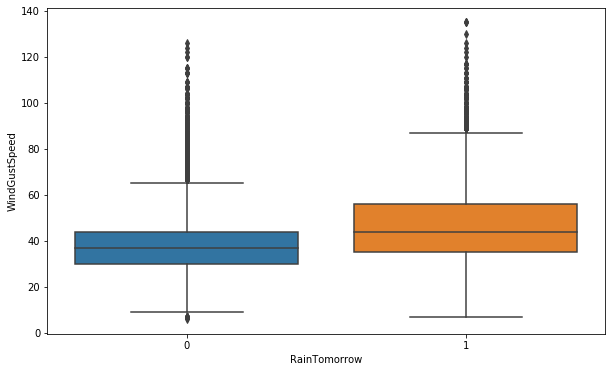

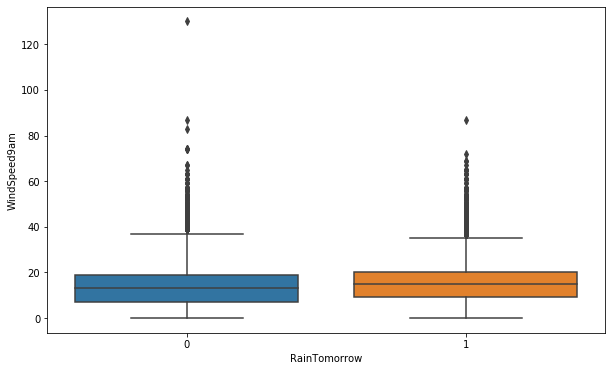

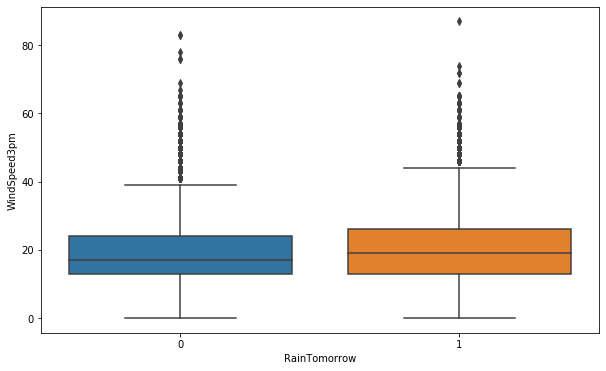

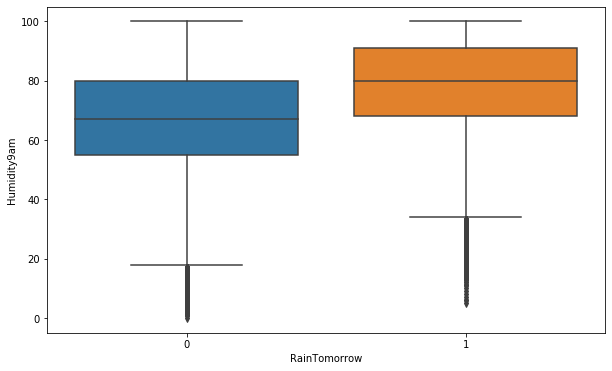

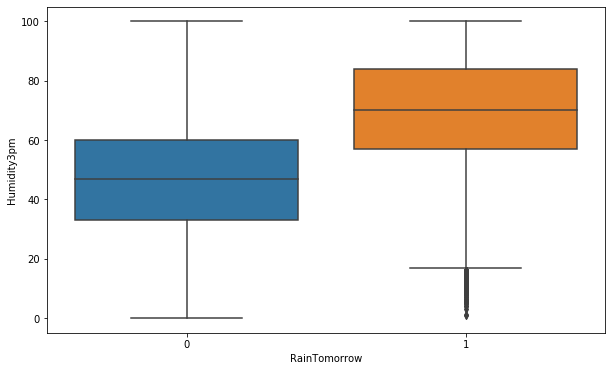

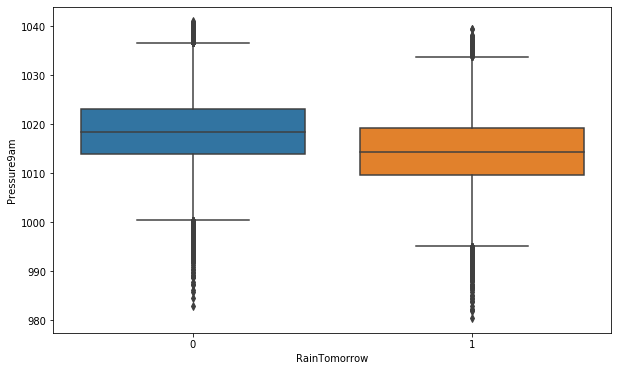

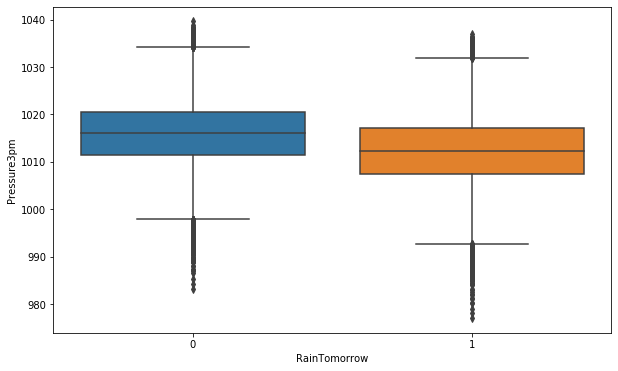

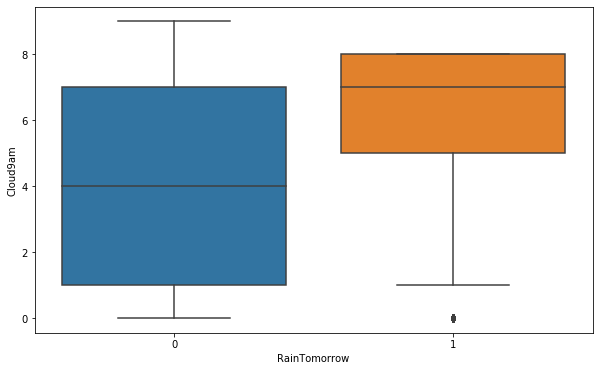

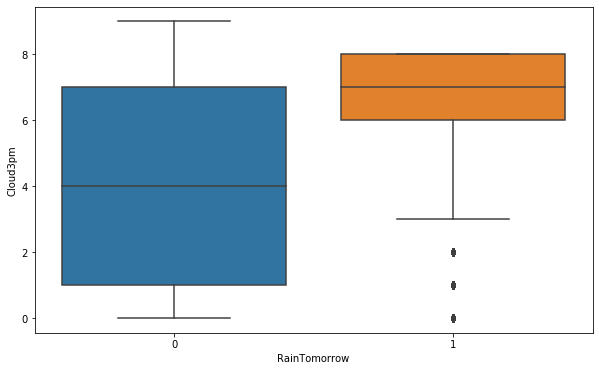

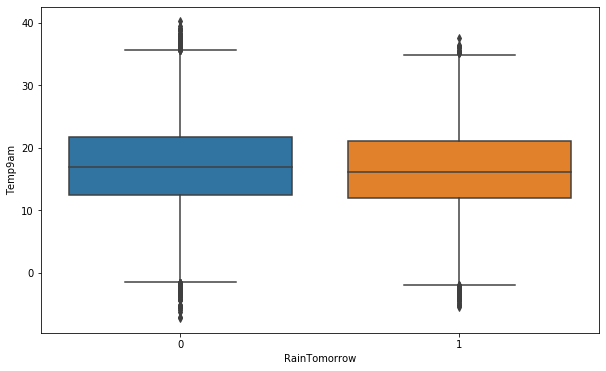

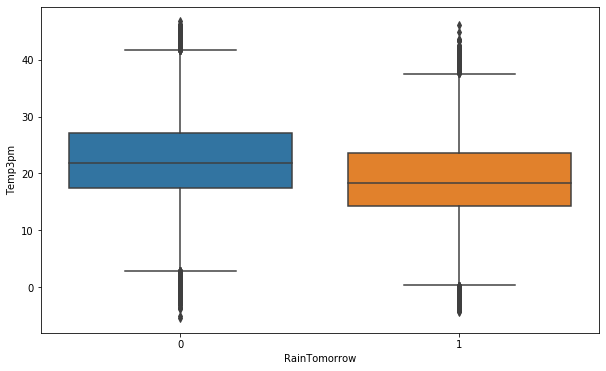

In [21]:
for i in df_num.drop(columns='RainTomorrow').columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df_num,x='RainTomorrow',y=i)
    plt.show

Data Rainfall,Evaporation,Windgustspeed,Windspeed9am,Windspeed3pm akan dibikin fence untuk outliersnya

In [22]:
def remove_outlier(df_in, col_name):
    outliers = []
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    outliers.append(fence_low)
    outliers.append(fence_high)
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return print('Outliers Fence for {} is {}'.format(col_name,outliers))
remove_outlier(df_num,'Rainfall')
remove_outlier(df_num,'Evaporation')
remove_outlier(df_num,'WindGustSpeed')
remove_outlier(df_num,'WindSpeed9am')
remove_outlier(df_num,'WindSpeed3pm')

Outliers Fence for Rainfall is [-1.2000000000000002, 2.0]
Outliers Fence for Evaporation is [-4.600000000000001, 14.600000000000001]
Outliers Fence for WindGustSpeed is [5.5, 73.5]
Outliers Fence for WindSpeed9am is [-11.0, 37.0]
Outliers Fence for WindSpeed3pm is [-3.5, 40.5]


In [23]:
def max_value(data, variable, top):
    return np.where(data[variable]>top, top, data[variable])
for data_nonoutliers in [df_num]:
    data_nonoutliers['Rainfall']=max_value(data_nonoutliers,'Rainfall',2.0)
    data_nonoutliers['Evaporation']=max_value(data_nonoutliers,'Evaporation',14.6)
    data_nonoutliers['WindGustSpeed']=max_value(data_nonoutliers,'WindGustSpeed',73.5)
    data_nonoutliers['WindSpeed9am']=max_value(data_nonoutliers,'WindSpeed9am',37.0)
    data_nonoutliers['WindSpeed3pm']=max_value(data_nonoutliers,'WindSpeed3pm',40.5)

C:\Users\Cornelis\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Cornelis\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Cornelis\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://panda

In [24]:
def min_value(data, variable,bottom):
    return np.where(data[variable]<bottom, bottom, data[variable])
for data_nonoutliers in [df_num]:
    data_nonoutliers['Rainfall']=min_value(data_nonoutliers,'Rainfall',-1.2)
    data_nonoutliers['Evaporation']=min_value(data_nonoutliers,'Evaporation',-4.6)
    data_nonoutliers['WindGustSpeed']=min_value(data_nonoutliers,'WindGustSpeed',5.5)
    data_nonoutliers['WindSpeed9am']=min_value(data_nonoutliers,'WindSpeed9am',-11.0)
    data_nonoutliers['WindSpeed3pm']=min_value(data_nonoutliers,'WindSpeed3pm',-3.5)

C:\Users\Cornelis\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Cornelis\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Cornelis\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://panda

In [25]:
df_num.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0


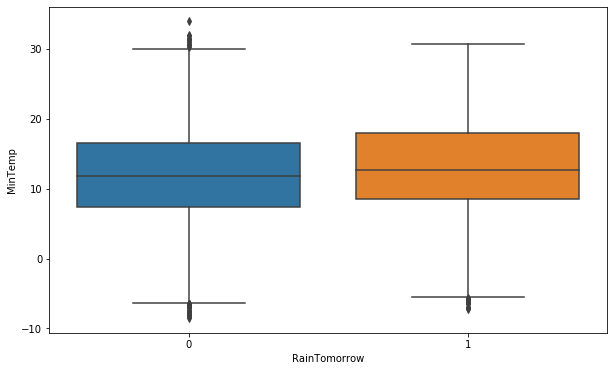

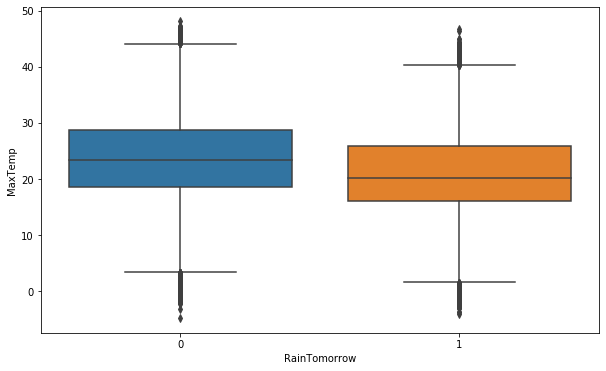

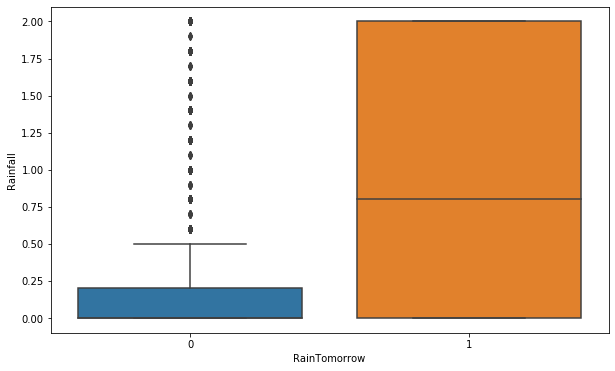

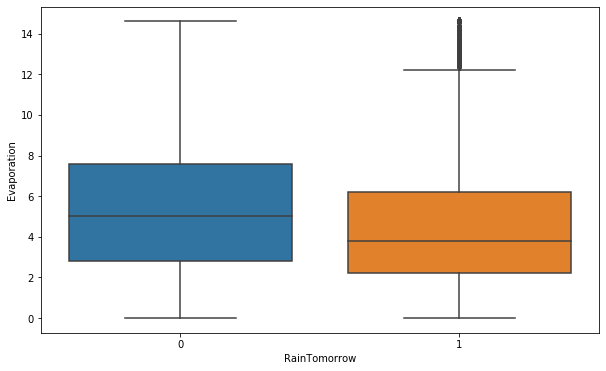

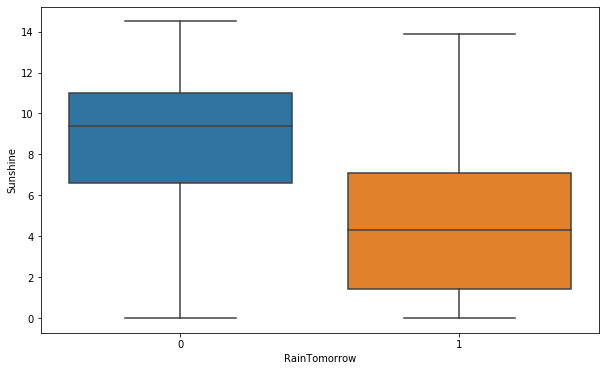

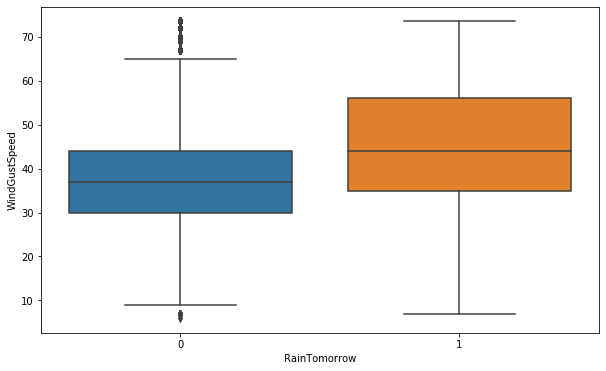

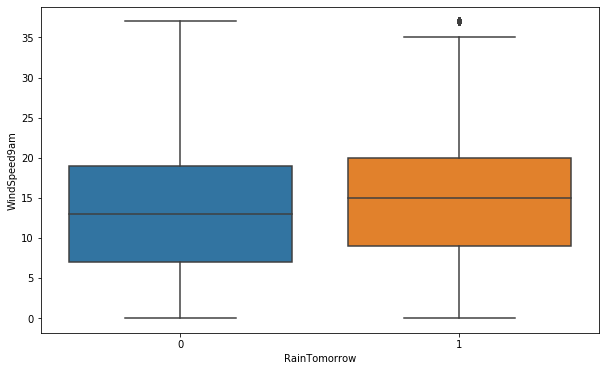

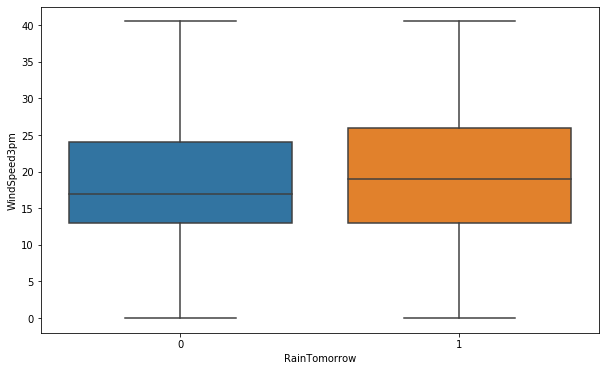

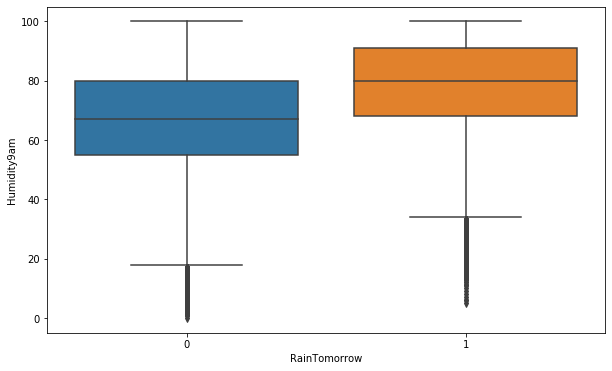

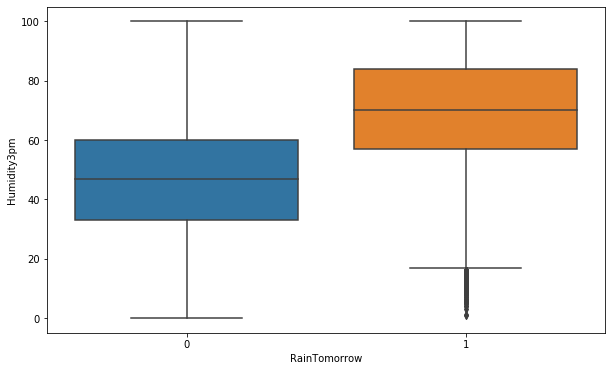

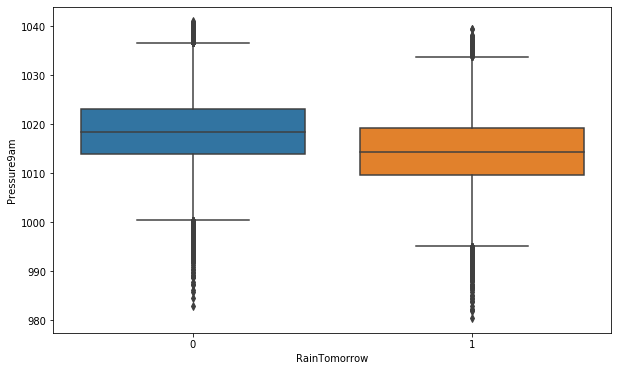

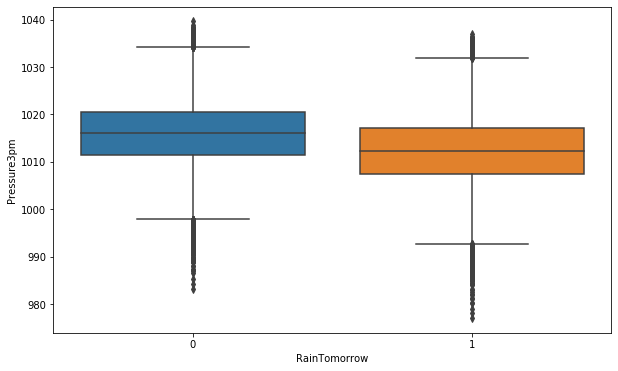

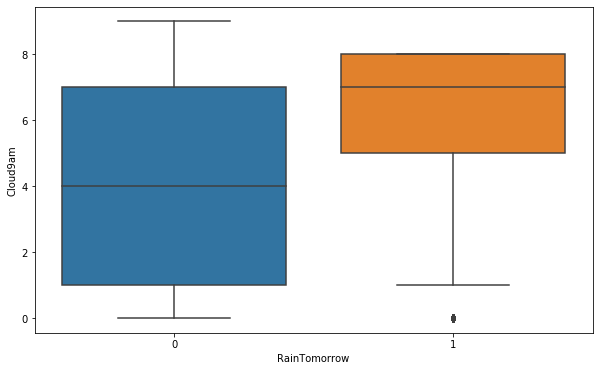

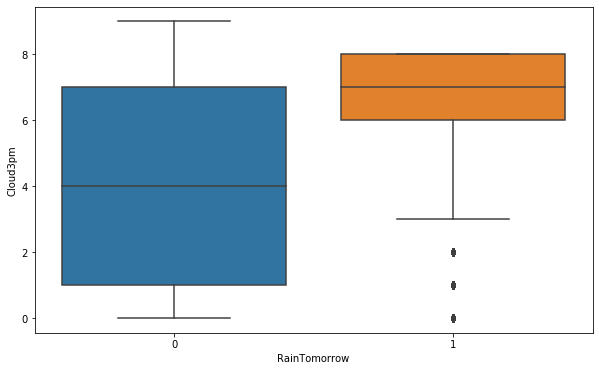

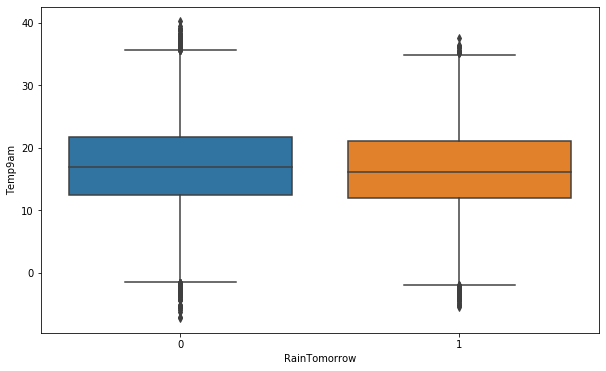

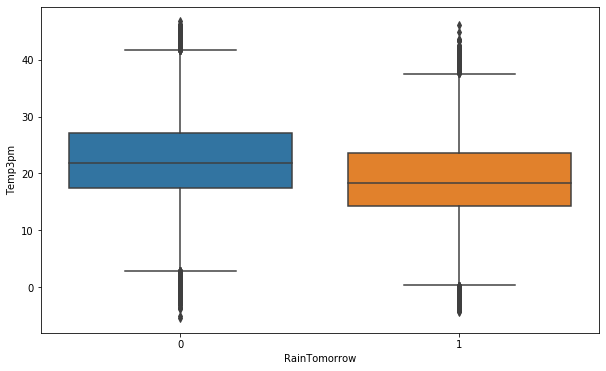

In [26]:
for i in df_num.drop(columns='RainTomorrow').columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df_num,x='RainTomorrow',y=i)
    plt.show

In [27]:
df_num['MinTemp']=df_num['MinTemp'].fillna(round(df_num['MinTemp'].median(),1))
df_num['MaxTemp']=df_num['MaxTemp'].fillna(round(df_num['MaxTemp'].median(),1))
df_num['Rainfall']=df_num['Rainfall'].fillna(round(df_num['Rainfall'].median(),1))
df_num['Evaporation']=df_num['Evaporation'].fillna(round(df_num['Evaporation'].median(),1))
df_num['Sunshine']=df_num['Sunshine'].fillna(round(df_num['Sunshine'].median(),1))
df_num['WindGustSpeed']=df_num['WindGustSpeed'].fillna(df_num['WindGustSpeed'].median())
df_num['WindSpeed9am']=df_num['WindSpeed9am'].fillna(df_num['WindSpeed9am'].median())
df_num['WindSpeed3pm']=df_num['WindSpeed3pm'].fillna(df_num['WindSpeed3pm'].median())
df_num['Humidity9am']=df_num['Humidity9am'].fillna(round(df_num['Humidity9am'].median(),1))
df_num['Humidity3pm']=df_num['Humidity3pm'].fillna(round(df_num['Humidity3pm'].median(),1))
df_num['Pressure9am']=df_num['Pressure9am'].fillna(round(df_num['Pressure9am'].mean(),1))
df_num['Pressure3pm']=df_num['Pressure3pm'].fillna(round(df_num['Pressure3pm'].mean(),1))
df_num['Cloud9am']=df_num['Cloud9am'].fillna(round(df_num['Cloud9am'].median(),1))
df_num['Cloud3pm']=df_num['Cloud3pm'].fillna(round(df_num['Cloud3pm'].median(),1))
df_num['Temp9am']=df_num['Temp9am'].fillna(round(df_num['Temp9am'].median(),1))
df_num['Temp3pm']=df_num['Temp3pm'].fillna(round(df_num['Temp3pm'].median(),1))

C:\Users\Cornelis\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Cornelis\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Cornelis\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:

In [28]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 17 columns):
MinTemp          142193 non-null float64
MaxTemp          142193 non-null float64
Rainfall         142193 non-null float64
Evaporation      142193 non-null float64
Sunshine         142193 non-null float64
WindGustSpeed    142193 non-null float64
WindSpeed9am     142193 non-null float64
WindSpeed3pm     142193 non-null float64
Humidity9am      142193 non-null float64
Humidity3pm      142193 non-null float64
Pressure9am      142193 non-null float64
Pressure3pm      142193 non-null float64
Cloud9am         142193 non-null float64
Cloud3pm         142193 non-null float64
Temp9am          142193 non-null float64
Temp3pm          142193 non-null float64
RainTomorrow     142193 non-null int32
dtypes: float64(16), int32(1)
memory usage: 17.9 MB


In [29]:
df1 = df_num
df1.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,13.4,22.9,0.6,4.8,8.5,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0
1,7.4,25.1,0.0,4.8,8.5,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0
2,12.9,25.7,0.0,4.8,8.5,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0
3,9.2,28.0,0.0,4.8,8.5,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0
4,17.5,32.3,1.0,4.8,8.5,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0


In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(df1.drop(columns=['RainTomorrow']),df1.RainTomorrow,test_size = 0.4,random_state=101)

In [31]:
X_train.shape,X_test.shape

((85315, 16), (56878, 16))

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,confusion_matrix,log_loss,matthews_corrcoef

pipe_knn = Pipeline([('std_scl', StandardScaler()), 
                    ('pca', PCA(n_components=10)),
                    ('knn', KNeighborsClassifier(n_neighbors=50))])

pipe_knn.fit(X_train, y_train)

print('Test Accuracy: %.3f' % pipe_knn.score(X_test, y_test))
knn_pred=pipe_knn.predict(X_test)
print(classification_report(y_test,knn_pred))
print(confusion_matrix(y_test,knn_pred))

Test Accuracy: 0.835
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     44061
           1       0.74      0.41      0.53     12817

    accuracy                           0.84     56878
   macro avg       0.80      0.68      0.71     56878
weighted avg       0.82      0.84      0.82     56878

[[42241  1820]
 [ 7546  5271]]


In [ ]:
pipe_rfc = Pipeline([('std_scl', StandardScaler()), 
                    ('pca', PCA(n_components=10)),
                    ('rfc', RandomForestClassifier(n_estimators=250,criterion='gini',n_jobs=-1,random_state=101))])

pipe_rfc.fit(X_train, y_train)

print('Test Accuracy: %.3f' % pipe_rfc.score(X_test, y_test))
pred_rfc=pipe_rfc.predict(X_test)

print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

In [ ]:
pipe_xgb = Pipeline([('std_scl', StandardScaler()), 
                    ('pca', PCA(n_components=10)),
                    ('xgb', XGBClassifier(n_estimators=200,learning_rate=0.2,n_jobs=-1,random_state=101))])

pipe_xgb.fit(X_train, y_train)

print('Test Accuracy: %.3f' % pipe_xgb.score(X_test, y_test))
train_pred=pipe_xgb.predict(X_train)
pred_xgb=pipe_xgb.predict(X_test)
print(classification_report(y_train,train_pred))
print(confusion_matrix(y_train,train_pred))
print(classification_report(y_test,pred_xgb))
print(confusion_matrix(y_test,pred_xgb))

In [ ]:
import pickle
pickle.dump(pipe_rfc,open('Rain_Predictor.sav','wb'))

In [ ]:
from numpy import loadtxt
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

model = XGBClassifier(n_estimators=250,learning_rate=0.2,n_jobs=-1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=False)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots(figsize=(10,6))
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots(figsize=(10,6))
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_xgb,
                        X=X_train,
                        y=y_train,
                        cv=10,
                        n_jobs=1)

print('Cross validation scores: %s' % scores)

plt.title('Cross validation scores')
plt.scatter(np.arange(len(scores)), scores)
plt.axhline(y=np.mean(scores), color='g') # Mean value of cross validation scores
plt.show()

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_xgb,
                                                       X=df1.drop(columns=['RainTomorrow']),
                                                       y=df1['RainTomorrow'],
                                                       train_sizes=np.linspace(0.1, 1.0, 10),
                                                       cv=10)

print('The Train Score are: {}'.format(train_scores))
# Mean value of accuracy against training data
train_mean = np.mean(train_scores, axis=1)
print('Train mean are: {}'.format(train_mean))
print('Train_sizes are: {}'.format(train_sizes))
# Standard deviation of training accuracy per number of training samples
train_std = np.std(train_scores, axis=1)

# Same as above for test data
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot training accuracies 
plt.plot(train_sizes, train_mean, color='red', marker='o', label='Training Accuracy')
# Plot the variance of training accuracies
plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='red')

# Plot for test data as training data
plt.plot(train_sizes, test_mean, color='blue', linestyle='--', marker='s', 
        label='Test Accuracy')
plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='blue')

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.evals_result()

In [ ]:
model = XGBClassifier(n_estimators=250,learning_rate=0.2,n_jobs=-1)
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

param_learning = np.linspace(0.1,1,10)
param_estimator = (100,150,200,250,300)
param_grid = {'learning_rate': param_learning, 'n_estimators':param_estimator}

gs = GridSearchCV(pipe_xgb.steps[2][1],param_grid,scoring='accuracy')

# Training and searching hyper parameter space and evaluating model
# by using cross validation logic folded into 10
gs = gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)

In [ ]:
param_neighbors = (10,30,50,70,90)
param_grid = {'n_neighbors':param_neighbors}

gs = GridSearchCV(pipe_knn.steps[2][1],param_grid,scoring='accuracy')

# Training and searching hyper parameter space and evaluating model
# by using cross validation logic folded into 10
gs = gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)

In [ ]:
# param_learning = np.linspace(0.1,1,10)
param_estimator = (100,150,200,250,300)
param_grid = {'n_estimators':param_estimator}

gs = GridSearchCV(pipe_rfc.steps[2][1],param_grid,scoring='accuracy')

# Training and searching hyper parameter space and evaluating model
# by using cross validation logic folded into 10
gs = gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)

# PCA

In [ ]:
pca=PCA(n_components=4)
x_pca=pca.fit_transform(df1.drop(columns=['RainTomorrow']))

In [ ]:
var_ratio=pca.explained_variance_ratio_

In [ ]:
ratio_var=[0]

In [ ]:
for i in var_ratio:
    ratio_var.append(i)
ratio_var
var_ratio=np.asarray(ratio_var)
cum_var_exp=np.cumsum(var_ratio*100)
cum_var_exp

In [ ]:
plt.figure(figsize=(10,6))
sns.set(style = 'darkgrid')
plt.xlim(0, 10)
plt.ylim(0,100)
plt.plot(cum_var_exp,linestyle = '-',marker = 'o',color='g',linewidth=3)
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
plt.legend(loc='best')
plt.show()

In [ ]:
pca.components_

In [ ]:
plt.figure(figsize=(18,6))
sns.heatmap(pca.components_,cmap='plasma',annot=True)
plt.yticks([0,1,2,3,4],['PCA_1','PCA_2','PCA_3','PCA_4'],fontsize=12)
plt.xticks(range(len(df1.columns)),df1.columns,rotation=30,ha='left')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(16,12))
plt.title('Heatmap Correlation of the features')
heat = sns.heatmap(df_num.corr(),square=True, annot=True, fmt='.2f', linecolor='white')
heat.set_xticklabels(heat.get_xticklabels(),rotation=45)
plt.show()

In [ ]:
df_num.info()

In [ ]:
df_angka=df[data_num]
df_angka.head()

In [ ]:
df_angka.info()

In [ ]:
remove_outlier(df_angka,'Rainfall')
remove_outlier(df_angka,'Evaporation')
remove_outlier(df_angka,'WindGustSpeed')
remove_outlier(df_angka,'WindSpeed9am')
remove_outlier(df_angka,'WindSpeed3pm')
remove_outlier(df_angka,'MinTemp')
remove_outlier(df_angka,'MaxTemp')
remove_outlier(df_angka,'Humidity9am')
remove_outlier(df_angka,'Humidity3pm')
remove_outlier(df_angka,'Pressure9am')
remove_outlier(df_angka,'Pressure3pm')
remove_outlier(df_angka,'Cloud9am')
remove_outlier(df_angka,'Cloud3pm')
remove_outlier(df_angka,'Temp9am')
remove_outlier(df_angka,'Temp3pm')

In [ ]:
for data_nonoutliers in [df_angka]:
    data_nonoutliers['Rainfall']=max_value(data_nonoutliers,'Rainfall',2.0)
    data_nonoutliers['Evaporation']=max_value(data_nonoutliers,'Evaporation',14.6)
    data_nonoutliers['WindGustSpeed']=max_value(data_nonoutliers,'WindGustSpeed',73.5)
    data_nonoutliers['WindSpeed9am']=max_value(data_nonoutliers,'WindSpeed9am',37.0)
    data_nonoutliers['WindSpeed3pm']=max_value(data_nonoutliers,'WindSpeed3pm',40.5)
    data_nonoutliers['MinTemp']=max_value(data_nonoutliers,'MinTemp',30.6)
    data_nonoutliers['MaxTemp']=max_value(data_nonoutliers,'MaxTemp',43.7)
    data_nonoutliers['Humidity9am']=max_value(data_nonoutliers,'Humidity9am',122.0)
    data_nonoutliers['Humidity3pm']=max_value(data_nonoutliers,'Humidity3pm',109.5)
    data_nonoutliers['Pressure9am']=max_value(data_nonoutliers,'Pressure9am',1036.7)
    data_nonoutliers['Pressure3pm']=max_value(data_nonoutliers,'Pressure3pm',1034.4)    
    data_nonoutliers['Cloud9am']=max_value(data_nonoutliers,'Cloud9am',16.0)    
    data_nonoutliers['Cloud3pm']=max_value(data_nonoutliers,'Cloud3pm',14.5)    
    data_nonoutliers['Temp9am']=max_value(data_nonoutliers,'Temp9am',35.6)    
    data_nonoutliers['Temp3pm']=max_value(data_nonoutliers,'Temp3pm',41.1)    

In [ ]:
for data_nonoutliers in [df_angka]:
    data_nonoutliers['Rainfall']=min_value(data_nonoutliers,'Rainfall',-1.2)
    data_nonoutliers['Evaporation']=min_value(data_nonoutliers,'Evaporation',-4.6)
    data_nonoutliers['WindGustSpeed']=min_value(data_nonoutliers,'WindGustSpeed',5.5)
    data_nonoutliers['WindSpeed9am']=min_value(data_nonoutliers,'WindSpeed9am',-11.0)
    data_nonoutliers['WindSpeed3pm']=min_value(data_nonoutliers,'WindSpeed3pm',-3.5)
    data_nonoutliers['MinTemp']=min_value(data_nonoutliers,'MinTemp',-6.2)
    data_nonoutliers['MaxTemp']=min_value(data_nonoutliers,'MaxTemp',2.5)
    data_nonoutliers['Humidity9am']=min_value(data_nonoutliers,'Humidity9am',18.0)
    data_nonoutliers['Humidity3pm']=min_value(data_nonoutliers,'Humidity3pm',-6.5)
    data_nonoutliers['Pressure9am']=min_value(data_nonoutliers,'Pressure9am',998.7)
    data_nonoutliers['Pressure3pm']=min_value(data_nonoutliers,'Pressure3pm',996.0)    
    data_nonoutliers['Cloud9am']=min_value(data_nonoutliers,'Cloud9am',-8.0)    
    data_nonoutliers['Cloud3pm']=min_value(data_nonoutliers,'Cloud3pm',-5.5)    
    data_nonoutliers['Temp9am']=min_value(data_nonoutliers,'Temp9am',-1.7)    
    data_nonoutliers['Temp3pm']=min_value(data_nonoutliers,'Temp3pm',1.9)    

In [ ]:
for i in df_num.drop(columns='RainTomorrow').columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df_angka,x='RainTomorrow',y=i)
    plt.show

In [ ]:
df_angka['MinTemp']=df_angka['MinTemp'].fillna(round(df_angka['MinTemp'].median(),1))
df_angka['MaxTemp']=df_angka['MaxTemp'].fillna(round(df_angka['MaxTemp'].median(),1))
df_angka['Rainfall']=df_angka['Rainfall'].fillna(round(df_angka['Rainfall'].median(),1))
df_angka['Evaporation']=df_angka['Evaporation'].fillna(round(df_angka['Evaporation'].median(),1))
df_angka['Sunshine']=df_angka['Sunshine'].fillna(round(df_angka['Sunshine'].median(),1))
df_angka['WindGustSpeed']=df_angka['WindGustSpeed'].fillna(df_angka['WindGustSpeed'].median())
df_angka['WindSpeed9am']=df_angka['WindSpeed9am'].fillna(df_angka['WindSpeed9am'].median())
df_angka['WindSpeed3pm']=df_angka['WindSpeed3pm'].fillna(df_angka['WindSpeed3pm'].median())
df_angka['Humidity9am']=df_angka['Humidity9am'].fillna(round(df_angka['Humidity9am'].median(),1))
df_angka['Humidity3pm']=df_angka['Humidity3pm'].fillna(round(df_angka['Humidity3pm'].median(),1))
df_angka['Pressure9am']=df_angka['Pressure9am'].fillna(round(df_angka['Pressure9am'].mean(),1))
df_angka['Pressure3pm']=df_angka['Pressure3pm'].fillna(round(df_angka['Pressure3pm'].mean(),1))
df_angka['Cloud9am']=df_angka['Cloud9am'].fillna(round(df_angka['Cloud9am'].median(),1))
df_angka['Cloud3pm']=df_angka['Cloud3pm'].fillna(round(df_angka['Cloud3pm'].median(),1))
df_angka['Temp9am']=df_angka['Temp9am'].fillna(round(df_angka['Temp9am'].median(),1))
df_angka['Temp3pm']=df_angka['Temp3pm'].fillna(round(df_angka['Temp3pm'].median(),1))

In [ ]:
df2=df_angka

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(df2.drop(columns=['RainTomorrow']),df2.RainTomorrow,test_size = 0.3)

In [ ]:
X_train.shape,X_test.shape

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,confusion_matrix,log_loss,matthews_corrcoef

pipe_knn = Pipeline([('std_scl', StandardScaler()), 
                    ('pca', PCA(n_components=10)),
                    ('knn', KNeighborsClassifier(n_neighbors=50))])

pipe_knn.fit(X_train, y_train)

print('Test Accuracy: %.3f' % pipe_knn.score(X_test, y_test))
train_pred=pipe_knn.predict(X_train)
knn_pred=pipe_knn.predict(X_test)
print(classification_report(y_train,train_pred))
print(confusion_matrix(y_train,train_pred))
print(classification_report(y_test,knn_pred))
print(confusion_matrix(y_test,knn_pred))

In [ ]:
pipe_rfc = Pipeline([('std_scl', StandardScaler()), 
                    ('pca', PCA(n_components=10)),
                    ('rfc', RandomForestClassifier(n_estimators=250,criterion='gini',n_jobs=-1))])

pipe_rfc.fit(X_train, y_train)

print('Test Accuracy: %.3f' % pipe_rfc.score(X_test, y_test))
pred_rfc=pipe_rfc.predict(X_test)
train_pred=pipe_rfc.predict(X_train)
print(classification_report(y_train,train_pred))
print(confusion_matrix(y_train,train_pred))
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

In [ ]:
pipe_xgb = Pipeline([('std_scl', StandardScaler()), 
                    ('pca', PCA(n_components=10)),
                    ('xgb', XGBClassifier(n_estimators=200,learning_rate=0.2,n_jobs=-1))])

pipe_xgb.fit(X_train, y_train)

print('Test Accuracy: %.3f' % pipe_xgb.score(X_test, y_test))
train_pred=pipe_xgb.predict(X_train)
pred_xgb=pipe_xgb.predict(X_test)
print(classification_report(y_train,train_pred))
print(confusion_matrix(y_train,train_pred))
print(classification_report(y_test,pred_xgb))
print(confusion_matrix(y_test,pred_xgb))